####INTEGRANTES




*   Lisseth Mayerly Merchan Naranjo 
*   Linda Katherine Reyes Buitrago

*   Elemento de lista



In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df= pd.read_csv('/content/datos_whales.csv')

In [ ]:
df.head(15)

,Country,SeeWhales,Age,Gender,Education,Income_AUD,Income,AdultWhales,YoungWhales,Max_wtp,wtp,PayConserve
0,Australia,1,31.0,Female,Diploma,"$60,001 - $70,000",65000.5,2,Yes,0.0,Less,1
1,UK,0,22.0,Female,Degree,"Less than $20,000",10000.0,6,No,0.0,More,0
2,USA,0,46.0,Female,Degree,"More than $70,000",85000.5,7,No,0.0,More,0
3,France,0,37.0,Female,Diploma,"$20,001 - $30,000",25000.5,4,Yes,0.0,More,1
4,UK,0,66.0,Female,Degree,NaN,NaN,6,No,0.0,More,0
5,Australia,0,65.0,Male,Post-graduate degree,"$40,001 - $50,000",45000.5,3,Yes,1.0,Same,1
6,Australia,0,49.0,Male,Post-graduate degree,"$20,001 - $30,000",25000.5,2,No,2.0,Less,1
7,UK,0,38.0,Female,Post-graduate degree,"More than $70,000",85000.5,0,Yes,0.0,More,0
8,Australia,0,54.0,Male,Completed year 12,"More than $70,000",85000.5,6,Yes,5.0,Same,1
9,Australia,0,59.0,Female,Completed year 10,"Less than $20,000",10000.0,4,No,0.0,More,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      701 non-null    object 
 1   SeeWhales    701 non-null    int64  
 2   Age          691 non-null    float64
 3   Gender       701 non-null    object 
 4   Education    701 non-null    object 
 5   Income_AUD   674 non-null    object 
 6   Income       674 non-null    float64
 7   AdultWhales  701 non-null    int64  
 8   YoungWhales  701 non-null    object 
 9   Max_wtp      701 non-null    float64
 10  wtp          701 non-null    object 
 11  PayConserve  701 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 65.8+ KB


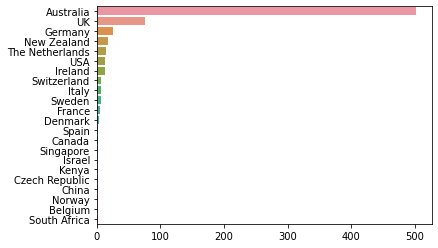

In [ ]:
Country=df['Country'].value_counts()

sns.barplot(x=Country.values, y=Country.index)
plt.show()

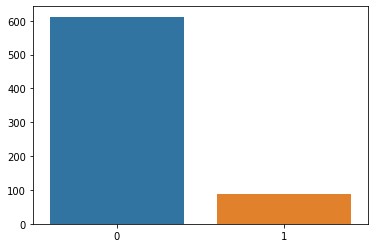

In [ ]:
SeeWhales=df['SeeWhales'].value_counts()

sns.barplot(x=SeeWhales.index, y=SeeWhales.values)
plt.show()

(array([ 24., 114.,  84., 108.,  89.,  99.,  78.,  52.,  31.,  12.]),
 array([13. , 19.9, 26.8, 33.7, 40.6, 47.5, 54.4, 61.3, 68.2, 75.1, 82. ]),
 <a list of 10 Patch objects>)

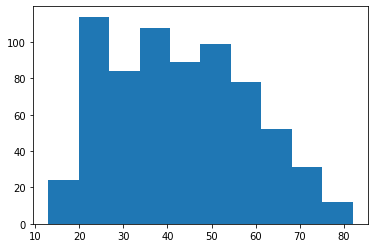

In [ ]:
plt.hist(df['Age'])

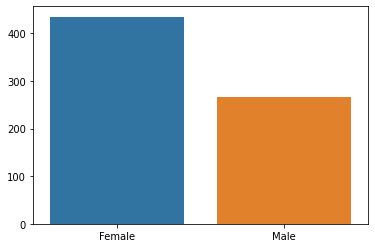

In [ ]:
Gender=df['Gender'].value_counts()

sns.barplot(x=Gender.index, y=Gender.values)
plt.show()

(array([ 88., 172.,  85., 100.,   0., 100.,  75.,  55.,  25.,   1.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

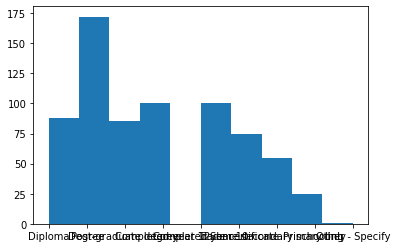

In [ ]:
plt.hist(df['Education'])

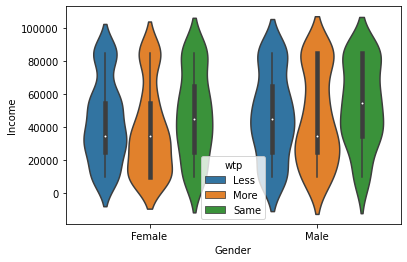

In [ ]:
sns.violinplot(data=df, y='Income', x='Gender', hue='wtp')

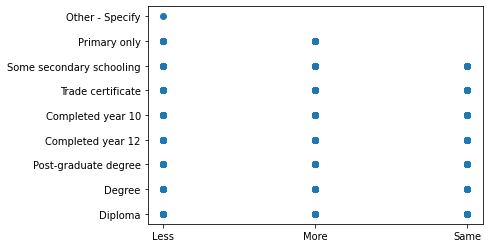

In [ ]:
plt.scatter(df['wtp'],df['Education'])

In [ ]:
df= df[['Age', 'Income', 'AdultWhales', 'YoungWhales','Max_wtp','wtp','PayConserve']]

In [ ]:
df

,Age,Income,AdultWhales,YoungWhales,Max_wtp,wtp,PayConserve
0,31.0,65000.5,2,Yes,0.0,Less,1
1,22.0,10000.0,6,No,0.0,More,0
2,46.0,85000.5,7,No,0.0,More,0
3,37.0,25000.5,4,Yes,0.0,More,1
4,66.0,NaN,6,No,0.0,More,0
...,...,...,...,...,...,...,...
696,56.0,10000.0,0,Yes,1.0,Same,1
697,38.0,35000.5,6,Yes,2.0,Same,1
698,24.0,25000.5,6,No,2.0,Less,1
699,50.0,35000.5,2,Yes,5.0,Same,1


In [ ]:
df.duplicated().sum()

8

In [ ]:
df.drop_duplicates()

,Age,Income,AdultWhales,YoungWhales,Max_wtp,wtp,PayConserve
0,31.0,65000.5,2,Yes,0.0,Less,1
1,22.0,10000.0,6,No,0.0,More,0
2,46.0,85000.5,7,No,0.0,More,0
3,37.0,25000.5,4,Yes,0.0,More,1
4,66.0,NaN,6,No,0.0,More,0
...,...,...,...,...,...,...,...
696,56.0,10000.0,0,Yes,1.0,Same,1
697,38.0,35000.5,6,Yes,2.0,Same,1
698,24.0,25000.5,6,No,2.0,Less,1
699,50.0,35000.5,2,Yes,5.0,Same,1


In [ ]:
df.isna().sum()

Age            10
Income         27
AdultWhales     0
YoungWhales     0
Max_wtp         0
wtp             0
PayConserve     0
dtype: int64

In [ ]:
df.columns

Index(['Age', 'Income', 'AdultWhales', 'YoungWhales', 'Max_wtp', 'wtp',
       'PayConserve'],
      dtype='object')

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace = True)

In [ ]:
df['Income'].fillna(df['Income'].median(), inplace = True)

In [ ]:
df.isna().sum()

Age            0
Income         0
AdultWhales    0
YoungWhales    0
Max_wtp        0
wtp            0
PayConserve    0
dtype: int64

In [ ]:
df.duplicated().sum()

8

In [ ]:
df= df.drop_duplicates().reset_index(drop= True)

In [ ]:
df.describe()

,Age,Income,AdultWhales,Max_wtp,PayConserve
count,693.000000,693.000000,693.000000,693.000000,693.000000
mean,42.764791,44163.459596,6.056277,3.183261,0.663781
std,15.397276,25935.371233,3.800442,18.145114,0.472756
min,13.000000,10000.000000,0.000000,0.000000,0.000000
25%,30.000000,25000.500000,4.000000,0.000000,0.000000
50%,41.000000,35000.500000,6.000000,0.000000,1.000000
75%,54.000000,65000.500000,8.000000,2.000000,1.000000
max,82.000000,85000.500000,30.000000,250.000000,1.000000


In [ ]:
df.columns

Index(['Age', 'Income', 'AdultWhales', 'YoungWhales', 'Max_wtp', 'wtp',
       'PayConserve'],
      dtype='object')

In [ ]:
df.replace({'YoungWhales':{'Yes':1, 'No':0}}, inplace = True)

In [ ]:
df

,Age,Income,AdultWhales,YoungWhales,Max_wtp,wtp,PayConserve
0,31.0,65000.5,2,1,0.0,Less,1
1,22.0,10000.0,6,0,0.0,More,0
2,46.0,85000.5,7,0,0.0,More,0
3,37.0,25000.5,4,1,0.0,More,1
4,66.0,35000.5,6,0,0.0,More,0
...,...,...,...,...,...,...,...
688,56.0,10000.0,0,1,1.0,Same,1
689,38.0,35000.5,6,1,2.0,Same,1
690,24.0,25000.5,6,0,2.0,Less,1
691,50.0,35000.5,2,1,5.0,Same,1


In [ ]:
df.corr()

,Age,Income,AdultWhales,YoungWhales,Max_wtp,PayConserve
Age,1.000000,-0.098163,0.092982,0.018660,-0.050025,-0.086319
Income,-0.098163,1.000000,0.053552,0.109073,0.053539,-0.007661
AdultWhales,0.092982,0.053552,1.000000,-0.006194,0.235167,0.041110
YoungWhales,0.018660,0.109073,-0.006194,1.000000,0.045773,0.012809
Max_wtp,-0.050025,0.053539,0.235167,0.045773,1.000000,0.124947
PayConserve,-0.086319,-0.007661,0.041110,0.012809,0.124947,1.000000


In [ ]:
import statsmodels.api as sm 

y=df['PayConserve']
x= sm.add_constant(df[['AdultWhales','YoungWhales', 'Income','Max_wtp']])

model = sm.OLS(y,x)
reg =model.fit()
reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PayConserve   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.807
Date:                Fri, 28 Oct 2022   Prob (F-statistic):             0.0249
Time:                        18:46:56   Log-Likelihood:                -458.04
No. Observations:                 693   AIC:                             926.1
Df Residuals:                     688   BIC:                             948.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.6491      0.053     12.313      0.000       0.546       0.753
AdultWhales     0.0017      0.005      0.341      0.734      -0.008       0.011
YoungWhales     0.0098      0.041      0.237      0.813      -0.071       0.091
Income      -2.899e-07   6.95e-07     -0.417      0.677   -1.65e-06    1.07e-06
Max_wtp         0.0032      0.001      3.137      0.002       0.001       0.005
==============================================================================
Omnibus:                     4749.227   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.167
Skew:                          -0.667   Prob(JB):                     8.06e-27
Kurtosis:                       1.456   Cond. No.                     1.70e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x

,const,AdultWhales,YoungWhales,Income,Max_wtp
0,1.0,2,1,65000.5,0.0
1,1.0,6,0,10000.0,0.0
2,1.0,7,0,85000.5,0.0
3,1.0,4,1,25000.5,0.0
4,1.0,6,0,35000.5,0.0
...,...,...,...,...,...
688,1.0,0,1,10000.0,1.0
689,1.0,6,1,35000.5,2.0
690,1.0,6,0,25000.5,2.0
691,1.0,2,1,35000.5,5.0


###Conclusion 

Segun el modelo, la variale significativa es la maxima dispocision, sin embargo los ingresos no represenan una variable significativa al modelo asi que la maxima dispocision no esta relacionada a la maxima dispocision. El ver ballenas tampoco representa una variable representativa ni las ballenas jovenes, adultas son significativas al modelo, Esto se podria explicar en que las personas al vivir experiencias en espacios en los que se requiere un cuidado al espacio no afecta su dispocision a pagar por preservarla.
sin embargo al analizar coeficientes en el modelo se puede apreciar que entre menos ingresos tenga un individuo, este va a tener una dispocision a pagar menor por preservar el lugar por lo tanto teniendo en cuenta resultados significativos en el modelo teniendo en cuenta coeficientes y p-valor podemos concluir que la maxima dispocision a pagar es una variable significativa que puede estar relacionada con el ingreso en el cual, a menor ingreso la dispocision a pagar va a ser menor que si tuviera el individuo un ingreso alto.
por otro lado el resto de las variables se comportan de forma positiva en el modelo, es decir, que una variacion positiva de cualquiera de las variables va a representar una mayor dispocision a pagar por la preservacion del lugar.
